### Imports and Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import io
import requests
import os

from scipy.stats import zscore
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import LabelEncoder
from IPython.display import display

from imblearn.over_sampling import SMOTE

from matplotlib import pyplot
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt

Panda Preferences

In [2]:
# Set options for displaying maximum columns and rows
pd.set_option('display.max_columns', None)  
#pd.set_option('display.max_rows', None)

**Read CSV**

In [3]:
# Read the CSV file into a DataFrame
data = pd.read_csv("../Datasets/Farm-Flows.csv")

# Display the DataFrame
display(data)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,192.168.1.13,37985,192.168.1.5,1883,tcp,mqtt,0.203465,151,32,OTH,T,T,0,DadA,10,671,10,552,-,0.014749,5,5,5,5,339.004882,339.004882,678.009764,1.000000,40,8,8,40,8,8,0,0,0,0,0,0,0,0,0,0,34.0,40.0,180.0,36.000000,2.345208,22.0,38.0,164.0,32.800000,7.429670,22.0,40.0,344.0,34.400000,5.460973,77.962875,1.511574e+02,4.560947e+02,114.023685,40.448036,2735.137939,3.143072e+03,1.155210e+04,2888.023853,177.765781,77.962875,3.143072e+03,1.474905e+04,1638.783349,1451.562027,23323.535870,5.000000,5.0,180.000000,164.0,180.0,164.0,5.0,5.0,394654.845792,14196.558644,1.474905e+04,1.474905e+04,1.474905e+04,1.474905e+04,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,Normal,0
1,192.168.1.4,51235,192.168.1.5,1880,tcp,http,0.013874,181,0,S1,T,T,0,ShADa,4,345,3,124,-,4.231047,15,15,10,5,3.545222,3.545222,7.090443,1.000000,300,20,20,300,20,20,0,0,0,10,5,30,0,0,0,0,0.0,34.0,250.0,16.666667,14.375906,0.0,30.0,150.0,10.000000,14.638501,0.0,34.0,400.0,13.333333,14.653076,6202.936172,1.072517e+06,4.190391e+06,299313.647406,441206.514988,2056.837082,1.092385e+06,4.221134e+06,301509.567669,473817.757851,40.054321,1.072517e+06,4.231047e+06,145898.177706,333811.857889,94.539244,7.500000,7.5,125.000000,75.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.231047e+06,4.231047e+06,4.231047e+06,4.231047e+06,0.0,0.0,0.0,0.0,0.0,0.0,2081,64048,1961,64048,Normal,0
2,192.168.1.4,63023,192.168.1.5,1880,tcp,-,0.000520,0,0,SF,T,T,0,FfA,2,80,1,40,-,4.388822,15,14,10,5,3.417774,3.189922,6.607696,0.933333,300,20,20,280,20,20,0,0,0,10,5,29,0,0,0,0,0.0,34.0,250.0,16.666667,14.375906,0.0,30.0,150.0,10.714286,14.917355,0.0,34.0,400.0,13.793103,14.690569,5327.939987,1.009849e+06,4.388822e+06,313487.291336,390104.262534,1737.833023,1.028327e+06,4.173141e+06,321010.846358,472242.170716,27.894974,9.713302e+05,4.388822e+06,156743.645668,308099.533449,91.140628,15.000000,14.0,250.000000,150.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.388822e+06,4.388822e+06,4.388822e+06,4.388822e+06,0.0,0.0,0.0,0.0,0.0,0.0,2081,64856,1931,64856,Normal,0
3,192.168.1.9,57223,192.168.1.5,1883,tcp,mqtt,4.107098,250,150,OTH,T,T,0,DadA,14,810,15,750,-,0.016622,4,3,2,0,240.647417,180.485563,421.132980,0.750000,84,20,24,64,20,24,0,2,0,2,0,6,0,0,0,0,0.0,175.0,181.0,45.250000,86.546230,0.0,0.0,0.0,0.000000,0.000000,0.0,175.0,181.0,25.857143,65.803821,81.062317,1.534891e+04,1.660085e+04,5533.615748,8517.742779,38.862228,1.647210e+04,1.651096e+04,8255.481720,11620.054722,17.881393,1.523805e+04,1.662183e+04,2770.30468

Fix Dataframe Mixed Types

In [4]:
data.groupby('is_attack')['is_attack'].count()

is_attack
0      27458
1    1282429
Name: is_attack, dtype: int64

In [5]:
data.groupby('traffic')['traffic'].count()

traffic
Arp_Spoofing       2967
BotNet_DDOS          64
HTTP_Flood       265025
ICMP_Flood        76849
MQTT_Flood       132506
Normal            27458
Port_Scanning    126700
TCP_Flood        381765
UDP_Flood        296553
Name: traffic, dtype: int64

In [6]:
data = data.drop('duration', axis=1)

In [7]:
data.groupby('is_attack')['is_attack'].count()

is_attack
0      27458
1    1282429
Name: is_attack, dtype: int64

In [8]:
data.groupby('traffic')['traffic'].count()

traffic
Arp_Spoofing       2967
BotNet_DDOS          64
HTTP_Flood       265025
ICMP_Flood        76849
MQTT_Flood       132506
Normal            27458
Port_Scanning    126700
TCP_Flood        381765
UDP_Flood        296553
Name: traffic, dtype: int64

-----------------------------------------------------------

## DF Statistics and Info

In [9]:
def display_information_dataframe(df_cop):
    # Create a summary of data types, column names, and unique values
    summary_data = [{'Data Type': dtype, 'Column Name': col, 'Unique Values': df_cop[col].unique()} for col, dtype in df_cop.dtypes.iteritems()]
    
    # Create a DataFrame from the summary data
    summary_df = pd.DataFrame(summary_data)
    
    # Set display options to show all rows and columns
    pd.options.display.max_rows = None
    pd.options.display.max_columns = None
    
    # Return the summary DataFrame
    return summary_df

In [10]:
display_information_dataframe(data)

,Data Type,Column Name,Unique Values
0,object,id.orig_h,"[192.168.1.13, 192.168.1.4, 192.168.1.9, 192.1..."
1,int64,id.orig_p,"[37985, 51235, 63023, 57223, 50213, 51319, 604..."
2,object,id.resp_h,[192.168.1.5]
3,int64,id.resp_p,"[1883, 1880, 6901, 31337, 65389, 6123, 16113, ..."
4,object,proto,"[tcp, udp, icmp]"
5,object,service,"[mqtt, http, -, radius, dns, dtls, syslog, dhc..."
6,object,orig_bytes,"[151, 181, 0, 250, 200, 207, 182, 353, 171, 26..."
7,object,resp_bytes,"[32, 0, 150, 120, 37, 294, 59, 64, -, 180, 240..."
8,object,conn_state,"[OTH, S1, SF, RSTRH, SHR, RSTO, S0, SH, RSTOS0..."
9,object,local_orig,[T]


--------------------------------------------

## Pre-processing

Usage Functions:

In [11]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print(f'[REMOVED OUTLIERS] {col}')
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [12]:
def one_hot_encoding(df, columns):
    for col in columns:
        print(f'[ONE HOT ENCODING] {col}')
        df = pd.get_dummies(df, columns=[col], prefix=col)  # Perform one-hot encoding on the column
    
    return df

In [13]:
def zscore_normalization(df, cols):
    # Standardize the selected columns
    for col in cols:
        if col not in df.columns:
            print(f"[WARNING] {col} not found in DataFrame.")
            continue
        print(f"[Z-SCORE] {col}")
        df[col] = zscore(df[col])
    
    print("[DONE] Z-score Normalization")
    print("[INFO] Current Fields in the DataFrame:")
    return df

In [14]:
def delete_columns(df, cols):
    for col in cols:
        df.drop(col, axis = 1, inplace = True)
        print(f'[REMOVED] {col}')
    
    return df

missed_bytes

In [15]:
scaler = MinMaxScaler()
data[['missed_bytes']] = scaler.fit_transform(data[['missed_bytes']])

orig_pkts, resp_pkts

In [16]:
columns = ['orig_pkts', 'resp_pkts']

data = remove_outliers(data, columns, 3)
data = zscore_normalization(data, columns)

[REMOVED OUTLIERS] orig_pkts
[REMOVED OUTLIERS] resp_pkts
[Z-SCORE] orig_pkts
[Z-SCORE] resp_pkts
[DONE] Z-score Normalization
[INFO] Current Fields in the DataFrame:


orig_ip_bytes, resp_ip_bytes

In [17]:
columns = ['orig_ip_bytes', 'resp_ip_bytes']

data = remove_outliers(data, columns, 3)
data = zscore_normalization(data, columns)

[REMOVED OUTLIERS] orig_ip_bytes
[REMOVED OUTLIERS] resp_ip_bytes
[Z-SCORE] orig_ip_bytes
[Z-SCORE] resp_ip_bytes
[DONE] Z-score Normalization
[INFO] Current Fields in the DataFrame:


fwd_pkts_tot, bwd_pkts_tot

In [18]:
columns = ['fwd_pkts_tot', 'bwd_pkts_tot']
new_columns = ['pkts_difference','pkts_ratio']

data['pkts_difference'] = data['fwd_pkts_tot'] - data['bwd_pkts_tot']

data = zscore_normalization(data, new_columns)
data = delete_columns(data,columns)

[Z-SCORE] pkts_difference
[WARNING] pkts_ratio not found in DataFrame.
[DONE] Z-score Normalization
[INFO] Current Fields in the DataFrame:
[REMOVED] fwd_pkts_tot
[REMOVED] bwd_pkts_tot


fwd_data_pkts_tot, bwd_data_pkts_tot

In [19]:
columns = ['fwd_data_pkts_tot', 'bwd_data_pkts_tot']
new_columns = ['data_pkts_difference','data_pkts_ratio']

data['data_pkts_difference'] = data['fwd_data_pkts_tot'] - data['bwd_data_pkts_tot']

data = zscore_normalization(data, new_columns)
data = delete_columns(data,columns)

[Z-SCORE] data_pkts_difference
[WARNING] data_pkts_ratio not found in DataFrame.
[DONE] Z-score Normalization
[INFO] Current Fields in the DataFrame:
[REMOVED] fwd_data_pkts_tot
[REMOVED] bwd_data_pkts_tot


fwd_pkts_per_sec, bwd_pkts_per_sec, flow_pkts_per_sec

In [20]:
columns = ['fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec']

data = remove_outliers(data, columns, 3)
data[columns] = scaler.fit_transform(data[columns])

[REMOVED OUTLIERS] fwd_pkts_per_sec
[REMOVED OUTLIERS] bwd_pkts_per_sec
[REMOVED OUTLIERS] flow_pkts_per_sec


down_up_ratio

In [21]:
columns = ['down_up_ratio']
data[columns] = scaler.fit_transform(data[columns])

fwd_header_size_min, fwd_header_size_max

In [22]:
columns = ['fwd_header_size_min', 'fwd_header_size_max']

data = zscore_normalization(data, columns)

[Z-SCORE] fwd_header_size_min
[Z-SCORE] fwd_header_size_max
[DONE] Z-score Normalization
[INFO] Current Fields in the DataFrame:


bwd_header_size_min, bwd_header_size_max

In [23]:
columns = ['bwd_header_size_min', 'bwd_header_size_max']

data = zscore_normalization(data, columns)

[Z-SCORE] bwd_header_size_min
[Z-SCORE] bwd_header_size_max
[DONE] Z-score Normalization
[INFO] Current Fields in the DataFrame:


fwd_pkts_payload.tot, fwd_pkts_payload.avg

In [24]:
columns = ['fwd_pkts_payload.tot', 'fwd_pkts_payload.avg']

data = zscore_normalization(data, columns)

[Z-SCORE] fwd_pkts_payload.tot
[Z-SCORE] fwd_pkts_payload.avg
[DONE] Z-score Normalization
[INFO] Current Fields in the DataFrame:


bwd_pkts_payload.tot,bwd_pkts_payload.avg

In [25]:
columns = ['bwd_pkts_payload.tot','bwd_pkts_payload.avg']

data = zscore_normalization(data, columns)

[Z-SCORE] bwd_pkts_payload.tot
[Z-SCORE] bwd_pkts_payload.avg
[DONE] Z-score Normalization
[INFO] Current Fields in the DataFrame:


flow_pkts_payload.tot,flow_pkts_payload.avg

In [26]:
columns = ['flow_pkts_payload.tot','flow_pkts_payload.avg']

data = zscore_normalization(data, columns)

[Z-SCORE] flow_pkts_payload.tot
[Z-SCORE] flow_pkts_payload.avg
[DONE] Z-score Normalization
[INFO] Current Fields in the DataFrame:


fwd_iat.tot,fwd_iat.avg

In [27]:
columns = ['fwd_iat.tot','fwd_iat.avg']

data = zscore_normalization(data, columns)

[Z-SCORE] fwd_iat.tot
[Z-SCORE] fwd_iat.avg
[DONE] Z-score Normalization
[INFO] Current Fields in the DataFrame:


bwd_iat.tot,bwd_iat.avg

In [28]:
columns = ['bwd_iat.tot','bwd_iat.avg']

data = zscore_normalization(data, columns)

[Z-SCORE] bwd_iat.tot
[Z-SCORE] bwd_iat.avg
[DONE] Z-score Normalization
[INFO] Current Fields in the DataFrame:


flow_iat.tot,flow_iat.avg

In [29]:
columns = ['flow_iat.tot','flow_iat.avg']

data = zscore_normalization(data, columns)

[Z-SCORE] flow_iat.tot
[Z-SCORE] flow_iat.avg
[DONE] Z-score Normalization
[INFO] Current Fields in the DataFrame:


Unused Columns

In [30]:
columns = [
    'id.orig_h',
    'id.orig_p',
    'id.resp_h',
    'id.resp_p',
    'proto',
    'service',
    'orig_bytes',
    'resp_bytes',
    'conn_state',
    'local_orig',
    'local_resp',
    'history',
    'tunnel_parents',
    'flow_duration',
    'flow_FIN_flag_count',
    'flow_SYN_flag_count',
    'flow_RST_flag_count',
    'fwd_PSH_flag_count',
    'bwd_PSH_flag_count',
    'flow_ACK_flag_count',
    'fwd_URG_flag_count',
    'bwd_URG_flag_count',
    'flow_CWR_flag_count',
    'flow_ECE_flag_count',
    'fwd_pkts_payload.min',
    'fwd_pkts_payload.max',
    'fwd_pkts_payload.std',
    'bwd_pkts_payload.min',
    'bwd_pkts_payload.max',
    'bwd_pkts_payload.std',
    'flow_pkts_payload.min',
    'flow_pkts_payload.max',
    'flow_pkts_payload.std',
    'fwd_iat.min',
    'fwd_iat.max',
    'fwd_iat.std',
    'bwd_iat.min',
    'bwd_iat.max',
    'bwd_iat.std',
    'flow_iat.min',
    'flow_iat.max',
    'flow_iat.std',
    'payload_bytes_per_second',
    'fwd_subflow_pkts',
    'bwd_subflow_pkts',
    'fwd_subflow_bytes',
    'bwd_subflow_bytes',
    'fwd_bulk_bytes',
    'bwd_bulk_bytes',
    'fwd_bulk_packets',
    'bwd_bulk_packets',
    'fwd_bulk_rate',
    'bwd_bulk_rate',
    'active.min',
    'active.max',
    'active.tot',
    'active.avg',
    'active.std',
    'idle.min',
    'idle.max',
    'idle.tot',
    'idle.avg',
    'idle.std',
    'fwd_init_window_size',
    'bwd_init_window_size',
    'fwd_last_window_size',
    'bwd_last_window_size',
    
    'is_attack',
]

data = delete_columns(data,columns)

[REMOVED] id.orig_h
[REMOVED] id.orig_p
[REMOVED] id.resp_h
[REMOVED] id.resp_p
[REMOVED] proto
[REMOVED] service
[REMOVED] orig_bytes
[REMOVED] resp_bytes
[REMOVED] conn_state
[REMOVED] local_orig
[REMOVED] local_resp
[REMOVED] history
[REMOVED] tunnel_parents
[REMOVED] flow_duration
[REMOVED] flow_FIN_flag_count
[REMOVED] flow_SYN_flag_count
[REMOVED] flow_RST_flag_count
[REMOVED] fwd_PSH_flag_count
[REMOVED] bwd_PSH_flag_count
[REMOVED] flow_ACK_flag_count
[REMOVED] fwd_URG_flag_count
[REMOVED] bwd_URG_flag_count
[REMOVED] flow_CWR_flag_count
[REMOVED] flow_ECE_flag_count
[REMOVED] fwd_pkts_payload.min
[REMOVED] fwd_pkts_payload.max
[REMOVED] fwd_pkts_payload.std
[REMOVED] bwd_pkts_payload.min
[REMOVED] bwd_pkts_payload.max
[REMOVED] bwd_pkts_payload.std
[REMOVED] flow_pkts_payload.min
[REMOVED] flow_pkts_payload.max
[REMOVED] flow_pkts_payload.std
[REMOVED] fwd_iat.min
[REMOVED] fwd_iat.max
[REMOVED] fwd_iat.std
[REMOVED] bwd_iat.min
[REMOVED] bwd_iat.max
[REMOVED] bwd_iat.std
[REM

In [31]:
display_information_dataframe(data)

,Data Type,Column Name,Unique Values
0,float64,missed_bytes,"[0.0, 0.2294239391026379, 0.43031003267600554,..."
1,float64,orig_pkts,"[1.3526508333125344, 0.40565608838539485, 1.82..."
2,float64,orig_ip_bytes,"[2.6963435013912616, 0.11318443517488058, 2.70..."
3,float64,resp_pkts,"[3.6460797597013928, 0.8818288578192617, -0.50..."
4,float64,resp_ip_bytes,"[4.327665684205932, 1.0323527439584332, 4.1707..."
5,float64,fwd_pkts_per_sec,"[7.776270484850156e-05, 7.49671955101493e-05, ..."
6,float64,bwd_pkts_per_sec,"[0.00010565584897994996, 9.506708383560181e-05..."
7,float64,flow_pkts_per_sec,"[0.00010565583407878875, 9.84623432159424e-05,..."
8,float64,down_up_ratio,"[0.16666666666666666, 0.15555549999999999, 0.0..."
9,int64,fwd_header_size_tot,"[300, 40, 320, 280, 8, 84, 260, 288, 104, 160,..."


---------------------------------------

## Create Model & Train Model

In [32]:
x_columns = data.columns.drop('traffic')

le = LabelEncoder()
le.fit(data["traffic"].values)

x = data[x_columns].values
y = data["traffic"].values
y = le.transform(y)

In [33]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [34]:
# Split into training and testing sets
x_train_train, x_test_train, y_train_train, y_test_train = train_test_split(x_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

In [35]:
x_test.shape,y_test.shape

((279867, 29), (279867,))

In [36]:
x_train.shape,y_train.shape

((839599, 29), (839599,))

In [37]:
# Usage of ExtraTreesClassifier for feature selection
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2)
extra_tree_forest.fit(x, y)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in  extra_tree_forest.estimators_], axis = 0)

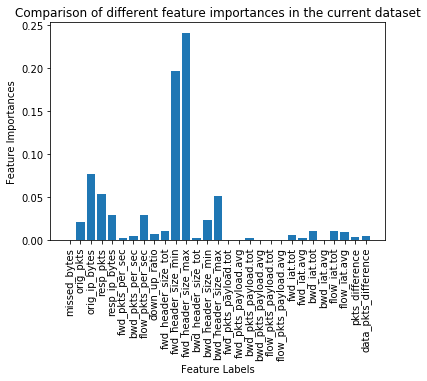

In [38]:
# Plor for the ExtraTreesClassifier output
plot.bar(x_columns, feature_importance_normalized)
plot.xlabel('Feature Labels')
plot.ylabel('Feature Importances')
plot.title('Comparison of different feature importances in the current dataset')
plot.xticks(rotation = 90)

# Plot size
plot.rcParams["figure.figsize"] = (70, 40)

plot.show()

In [39]:
import numpy as np

# Random state definition
random_state=42
np.random.seed(random_state)

In [40]:
from sklearn import metrics

# Classification Metrics: Accuracy, Recall, Precision & F1Score
def compute_metrics(y_test, pred):
    print('Accuracy:', metrics.accuracy_score(y_test, pred))
    print('Recall:', metrics.recall_score(y_test, pred, average = 'weighted'))
    print('Precision:', metrics.precision_score(y_test, pred, average = 'weighted'))
    print('F1-Score:', metrics.f1_score(y_test, pred, average = 'weighted'))

In [41]:
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

def extra_tree_classifier(x_train, y_train, x_columns):
    # Usage of ExtraTreesClassifier for feature selection
    extra_tree_forest = ExtraTreesClassifier(n_estimators=5, criterion='entropy', max_features=2, random_state=random_state)
    extra_tree_forest.fit(x_train, y_train)
    feature_importances = extra_tree_forest.feature_importances_
    feature_importance_normalized = np.std([tree.feature_importances_ for tree in  extra_tree_forest.estimators_], axis = 0)

    # Plot the feature importances
    plt.rcParams["figure.figsize"] = (70, 40)
    plt.bar(x_columns, feature_importance_normalized, align='center')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Importance')
    plt.title('Comparison of different feature importances in the current dataset')
    plt.xticks(rotation=90)
    plt.show()

In [42]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

ATTACKS = [
    'Arp Spoofing', 'BotNet DDOS', 
    'HTTP Flood', 'ICMP Flood', 
    'MQTT Flood', 'Normal', 
    'Port Scanning', 'TCP Flood', 
    'UDP Flood'
]
    
def conf_matrix(y_test, prediction, array_dimension = 2):
    if (array_dimension == 2):
        predict_classes = np.argmax(prediction, axis = 1)
        expected_classes = np.argmax(y_test, axis = 1)
    elif (array_dimension == 1):
        predict_classes = prediction
        expected_classes = y_test
    
    cm = confusion_matrix(expected_classes, predict_classes)
    cmd = ConfusionMatrixDisplay(cm, display_labels=ATTACKS)

    # Plot size
    fig, ax = plt.subplots(figsize=(11,11))
    
    cmd.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
    
    # Add axis labels and rotate them
    ax.set_xlabel('Predicted labels', rotation=0, labelpad=20, fontsize=11)
    ax.set_ylabel('True labels', rotation=90, labelpad=20, fontsize=11)

    ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
    ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
    ax.set_xticklabels(ATTACKS)
    ax.set_yticklabels(ATTACKS)
        
    ax.tick_params(axis='x', pad=35)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='center', va='center')
    ax.tick_params(axis='y', pad=35)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=40, ha='center', va='center')
    
    # Adjust colorbar size
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=11)  # Adjust the font size of colorbar labels
    cax = fig.add_axes([ax.get_position().x1+0.03,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(cmd.im_, cax=cax)

In [43]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshowac(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

[METRICS] Decision Tree Classifier
Accuracy: 0.8204647207423527
Recall: 0.8204647207423527
Precision: 0.7953104202718911
F1-Score: 0.769902682177795

[CMATRIX] Decision Tree Confusion Matrix


/project/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CPU times: user 1.38 s, sys: 20.5 ms, total: 1.4 s
Wall time: 1.39 s


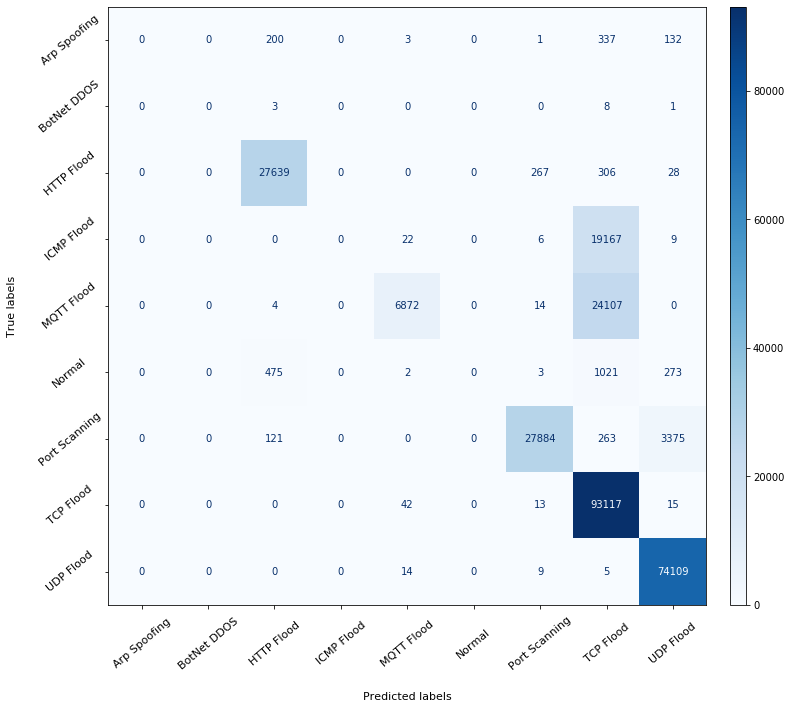

In [44]:
%%time

# Algorithm: DECISION TREE
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=random_state, max_leaf_nodes=5)
clf = clf.fit(x_train, y_train)
tree_prediction = clf.predict(x_test)

print(f'[METRICS] Decision Tree Classifier')
compute_metrics(y_test, tree_prediction)

print(f'\n[CMATRIX] Decision Tree Confusion Matrix')
conf_matrix(y_test, tree_prediction, 1)

[TREE] Decision Tree Diagram


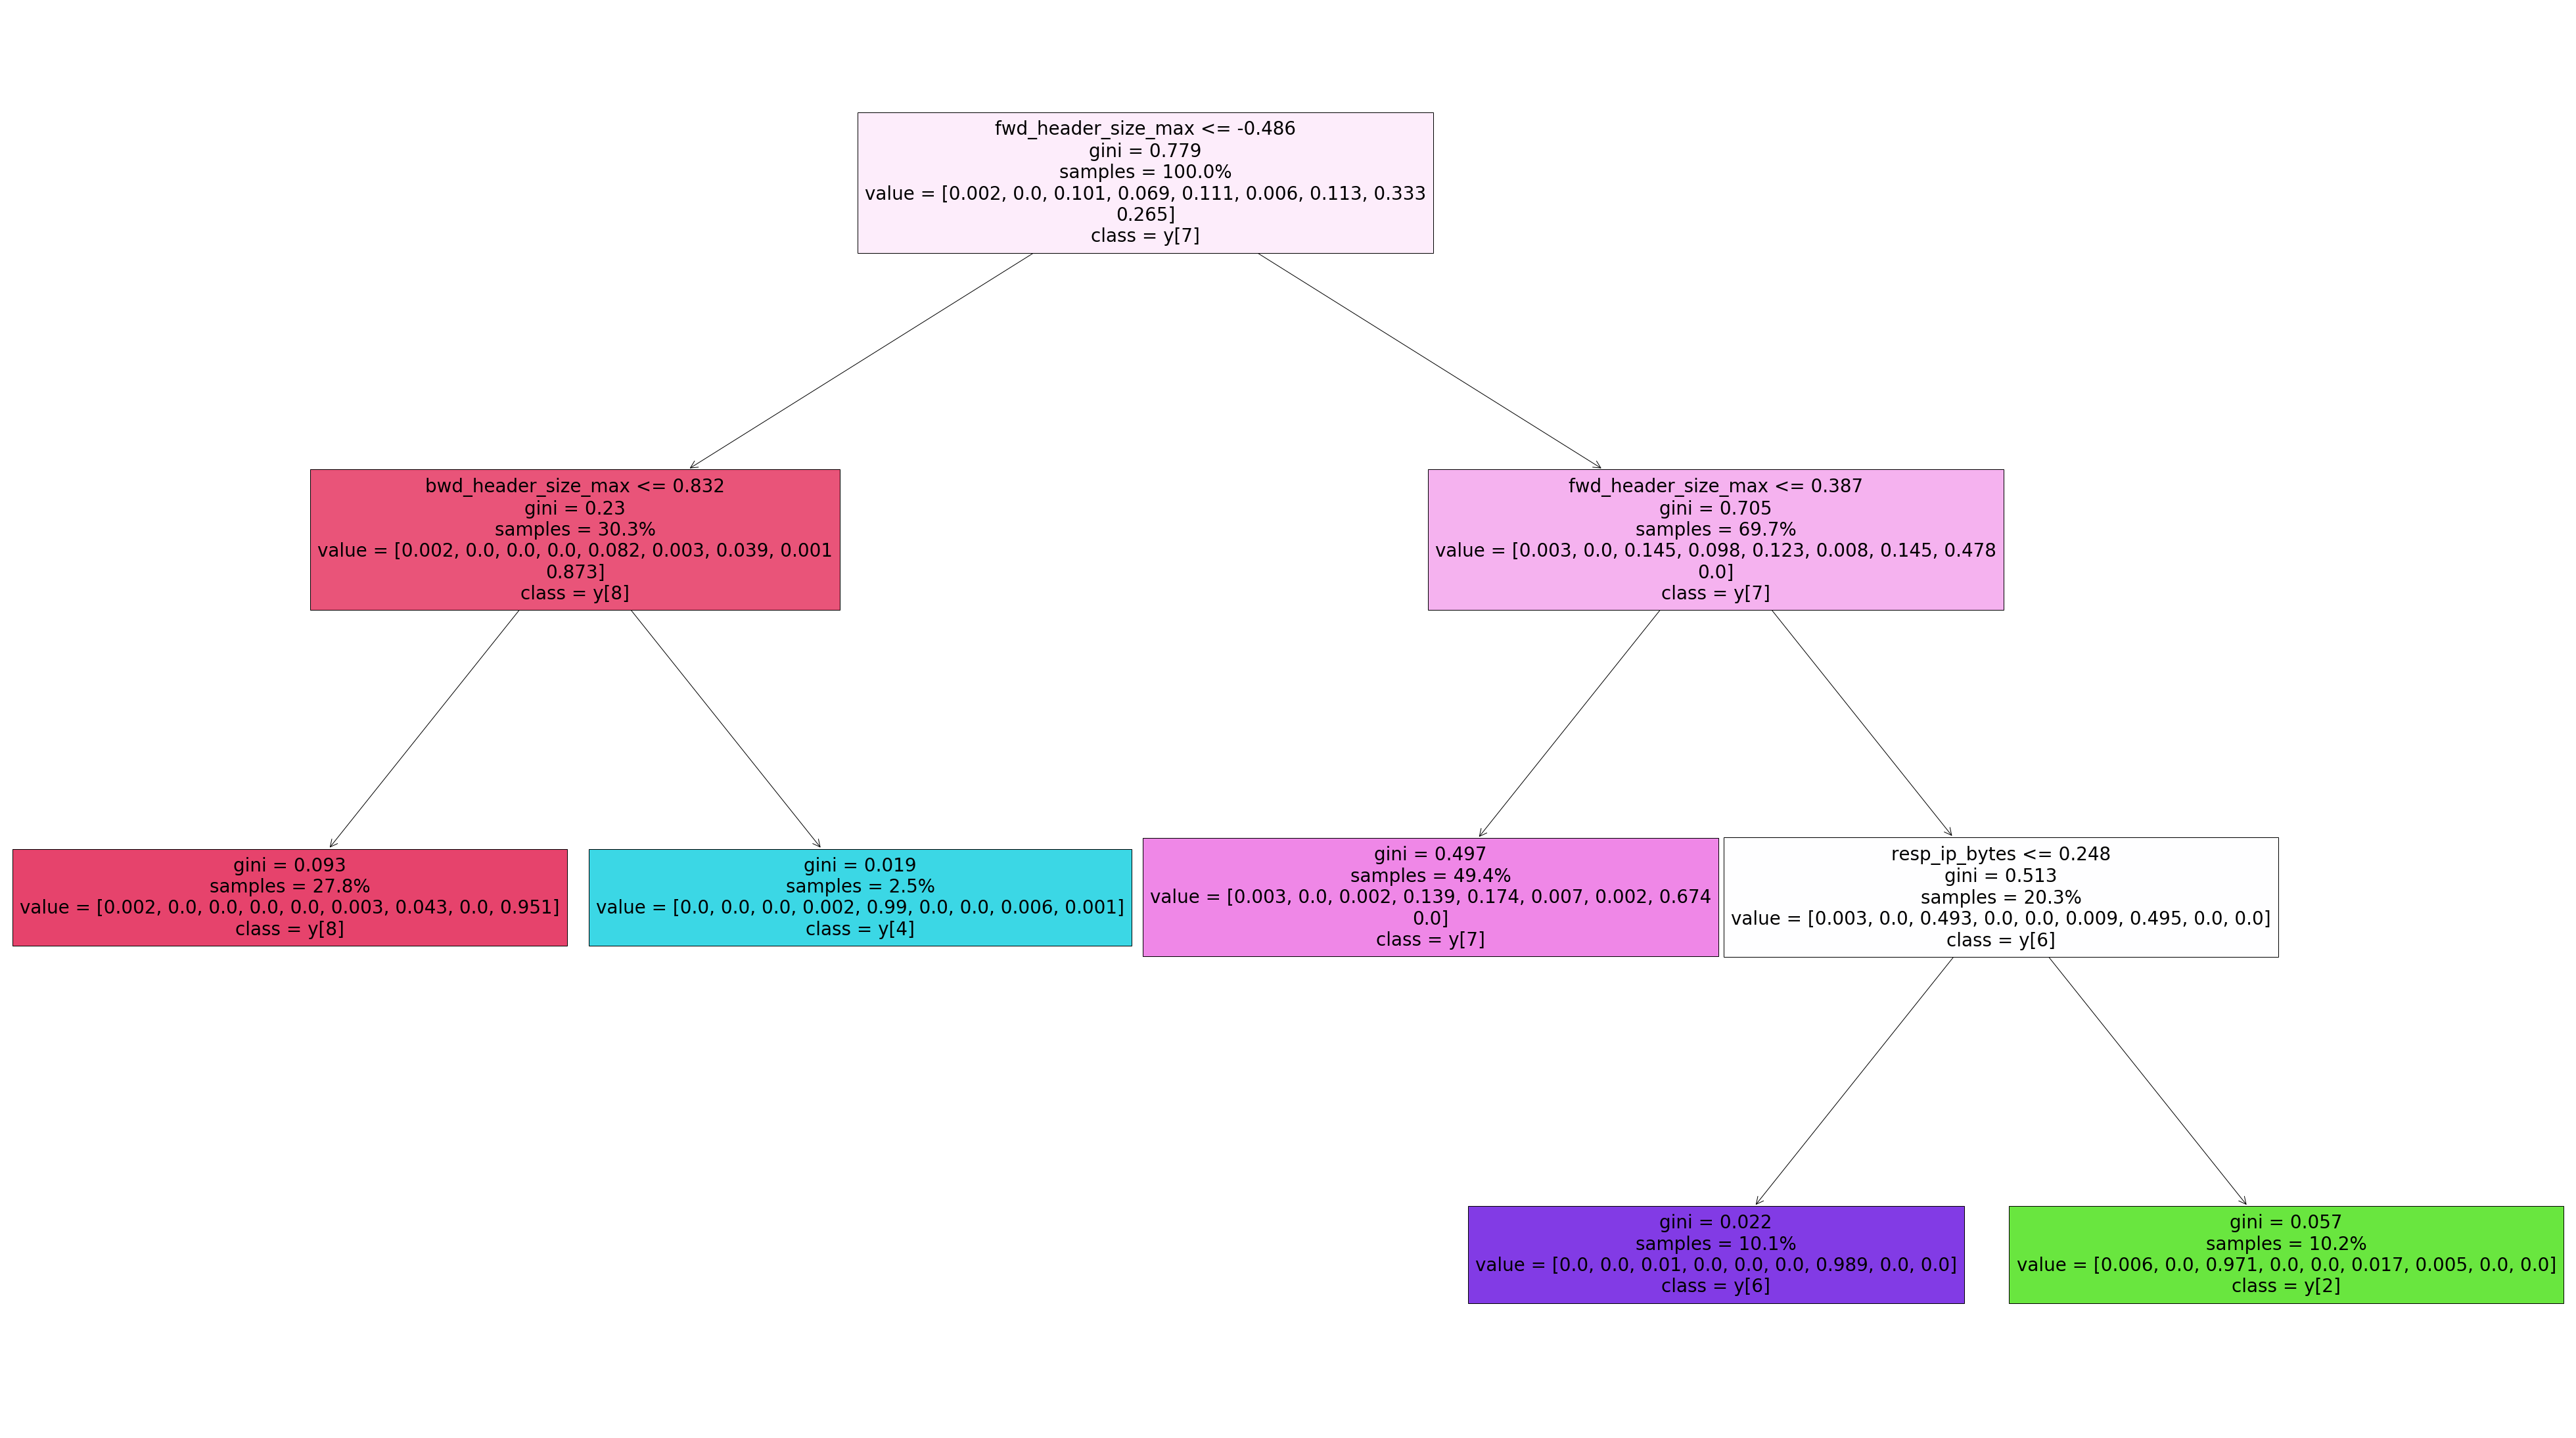

In [45]:
print(f'[TREE] Decision Tree Diagram')
tree.plot_tree(clf, feature_names=x_columns, class_names=True, filled=True, proportion=True)
plt.rcParams["figure.figsize"] = (90, 50)

[METRICS] Random Forest Classifier (Validation Set)
Accuracy: 0.8764770408801323
Recall: 0.8764770408801323
Precision: 0.8952869599694843
F1-Score: 0.8525352242812833

[CMATRIX] Random Forest Confusion Matrix (Validation Set)
CPU times: user 2.49 s, sys: 4.38 ms, total: 2.49 s
Wall time: 2.49 s


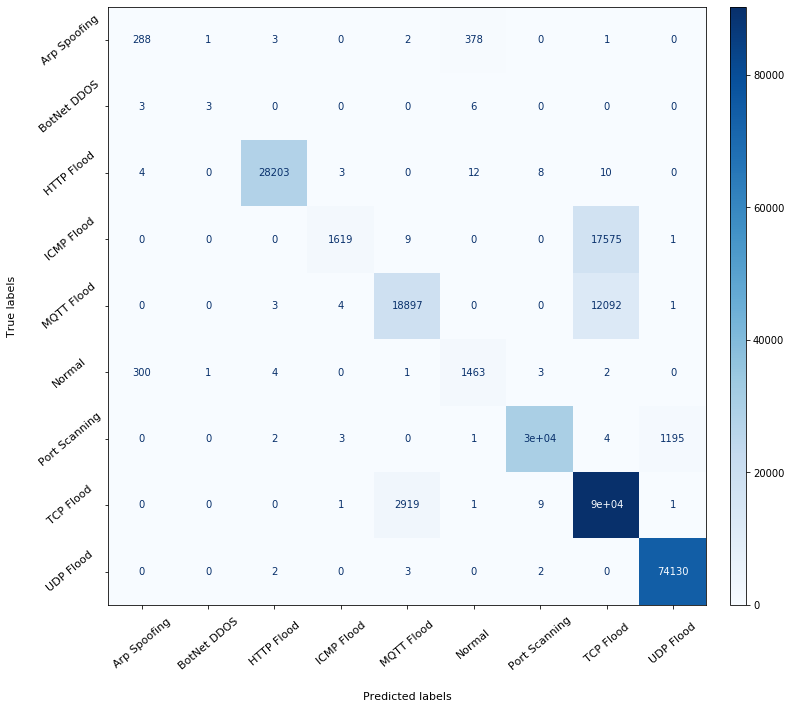

In [46]:
%%time

# Algorithm: RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

forest = RandomForestClassifier(n_estimators=5, random_state=random_state)
forest.fit(x_train, y_train)

# Validation
forest_validation_prediction = forest.predict(x_test)

print("[METRICS] Random Forest Classifier (Validation Set)")
compute_metrics(y_test, forest_validation_prediction)

print("\n[CMATRIX] Random Forest Confusion Matrix (Validation Set)")
conf_matrix(y_test, forest_validation_prediction, 1)

[METRICS] Decision Tree Classifier
Accuracy: 0.8762054833188622
Recall: 0.8762054833188622
Precision: 0.8951259961559253
F1-Score: 0.8523630378047606

[CMATRIX] Decision Tree Confusion Matrix
CPU times: user 2.49 s, sys: 6.78 ms, total: 2.5 s
Wall time: 2.5 s


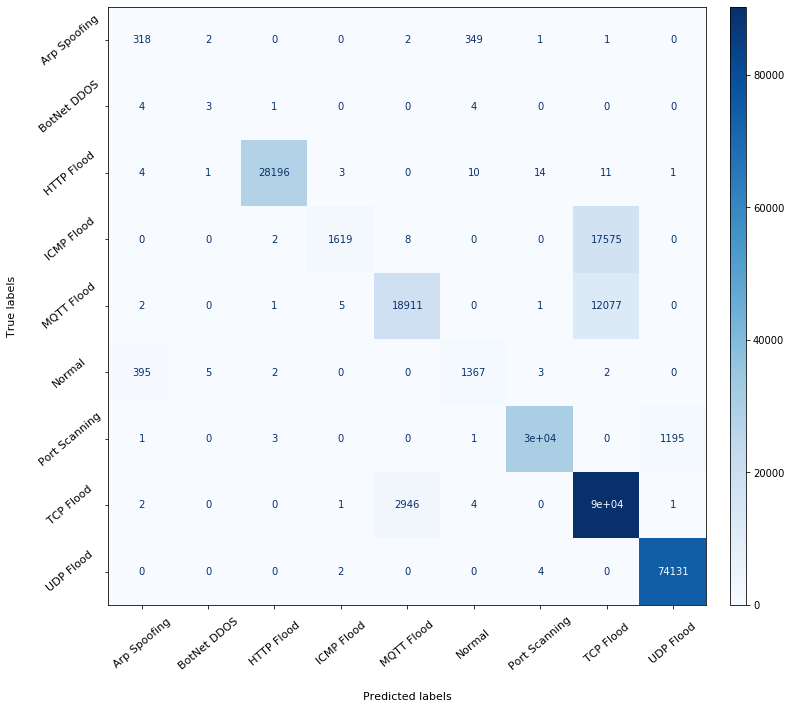

In [47]:
%%time

# Algorithm: DECISION TREE
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=random_state)
tree.fit(x_train, y_train)
tree_prediction = tree.predict(x_test)

print(f'[METRICS] Decision Tree Classifier')
compute_metrics(y_test, tree_prediction)

print(f'\n[CMATRIX] Decision Tree Confusion Matrix')
conf_matrix(y_test, tree_prediction, 1)